In [2]:
# import modules
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/Users/etmu9498/research/code/scripts")
import tc_metadata
import helper_fns
import make_plots_new_heights
import cloud_height

In [5]:
# setup: choose a dataset
metadata = tc_metadata.all_data( tc='sam')
crl_path = metadata['um_crl_path']
crl_name = 'crl-sam-09-27-eye-2.nc'
dataset = 3

# load data and helpful values
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
xaxis_data = crl_data.in_situ_distance.values
dist0 = metadata[ 'in_situ_eyewall_dists'][dataset][ 0]
dist1 = metadata[ 'in_situ_eyewall_dists'][dataset][ 1]

# find the indices and values in the crl distance dataset closest to the eyewall_dists limits
i1, x1 = helper_fns.closest_val( xaxis_data, dist0)
i2, x2 = helper_fns.closest_val( xaxis_data, dist1)

# find rainfall regions within the specified axes
# ignore counts for here
rainfall_positions, xaxis, counts = cloud_height.find_multi_cloud_heights( crl_name, -30, i1, i2)

# print( xaxis)
# print( '\n\n\n')
# print( rainfall_positions)


# setup for plotting: now and later
power = crl_data.power_new[i1:i2].values
dist = crl_data.in_situ_distance[i1:i2].values
profile = 122

# index where chosen distance equals return index... works for rainfall_positions and xaxis!
xinds = np.where( xaxis == dist[ profile])[0]

print( xinds)

[147 148]


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4860: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4860: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)


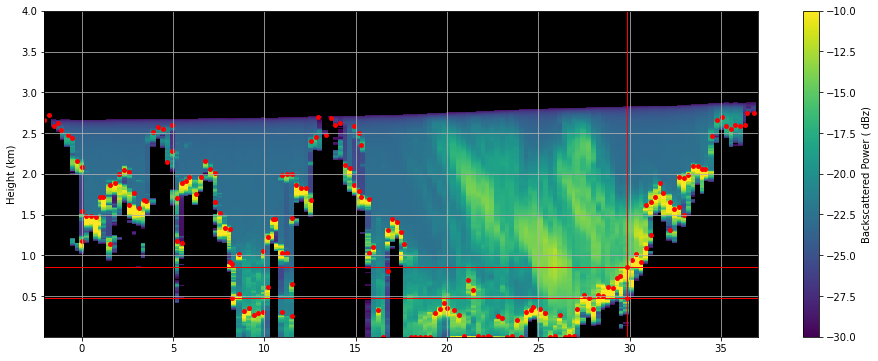

In [6]:
# plot test vals from output
make_plots_new_heights.plot_rainfall( crl_path, crl_name, 'in-situ-dist')

plt.scatter( xaxis, rainfall_positions, c='r', s=15)
plt.xlim( [x1, x2])
plt.axvline( x=crl_data.in_situ_distance[i1:i2][ profile], c='r', linewidth=1)

# plot lines where height peaks are
for xind in xinds:
    # height of cloud layer
    height = rainfall_positions[ xind]
    # closest height value in crl data
    idx = (np.abs( -crl_data.H_new - height )).argmin().values
    plt.axhline( y= height, c='r', linewidth=1)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4860: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4860: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)


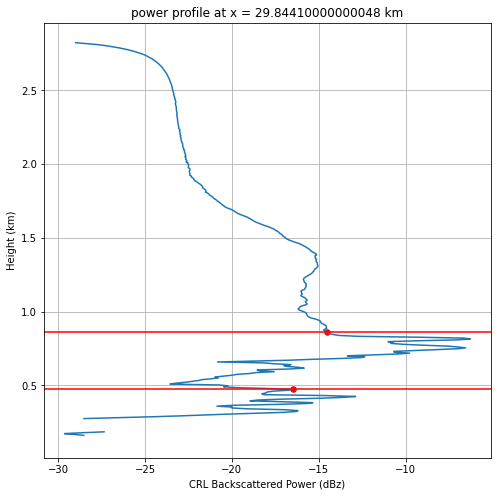

In [7]:
# plot power vs height cross sections throughout the sample area

plt.figure( figsize=( 8, 8))
plt.plot( power[ profile], - crl_data.H_new)
plt.grid('on')
plt.xlabel( "CRL Backscattered Power (dBz)")
plt.ylabel( "Height (km)")
plt.title( "power profile at x = " + str( dist[ profile] )+ " km")

# plot where the cloud layer(s) is(are) on the power profile!

for xind in xinds:
    # height of cloud layer
    height = rainfall_positions[ xind]
    # closest height value in crl data
    idx = (np.abs( -crl_data.H_new - height )).argmin().values

    plt.scatter( power[ profile][ idx], height, c='r', s=30, alpha=1)
    plt.axhline( y= height, c='r')
